In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import gmaps
from config import gkey

In [52]:
df_merge3 = pd.read_csv("Project_1/college-salaries/clean_data.csv")

Text(0,0.5,'Early Career Pay')

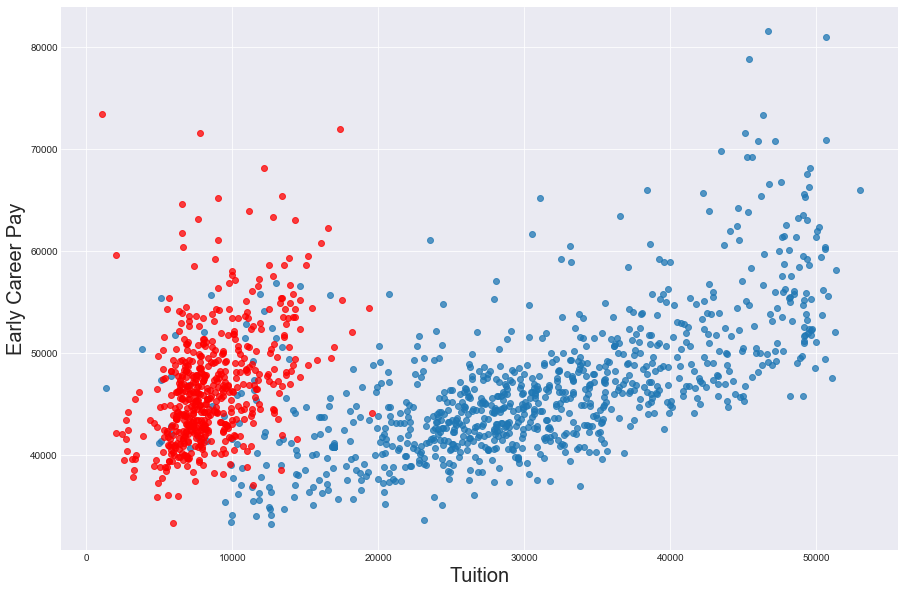

In [53]:
fig = plt.figure(figsize = (15,10))

sb.set_style("darkgrid")

early_private = list(df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"])
tuition_private = list(df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"])

early_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"])
tuition_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"])

plt.scatter(tuition_private, early_private, alpha = .75)
plt.scatter(tuition_public, early_public, c = "red", alpha = .75)

plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career Pay", fontsize = 20)

Text(0,0.5,'Mid Career Pay')

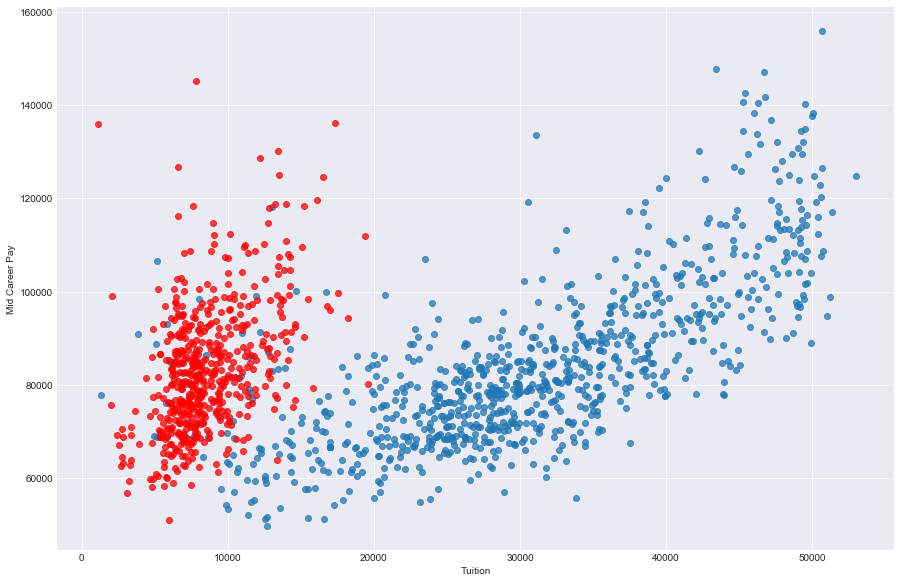

In [54]:
fig = plt.figure(figsize = (15,10))

early_private = list(df_merge3[df_merge3["School Type"].str.contains("Private")]["Mid-Career Pay"])
tuition_private = list(df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"])

early_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["Mid-Career Pay"])
tuition_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"])

plt.scatter(tuition_private, early_private, alpha = .75)
plt.scatter(tuition_public, early_public, c = "red", alpha = .75)

plt.xlabel("Tuition")
plt.ylabel("Mid Career Pay")

In [73]:
df_merge3["Bin"] = pd.qcut(df_merge3["Early Career"], 4, labels = ["low","mid-low","mid-high","high"])

In [56]:
df_merge3.loc[:,["Early Career","Bin"]].head()

,Early Career,Bin
0,46200,mid-high
1,46000,mid-high
2,54200,high
3,38300,low
4,49000,mid-high


In [57]:
df_merge3.groupby("Bin")["ADM_RATE_ALL"].mean()

Bin
low         0.668746
mid-low     0.697825
mid-high    0.677356
high        0.550647
Name: ADM_RATE_ALL, dtype: float64

In [58]:
df_cip = pd.melt(df_merge3,"Bin",df_merge3.iloc[:,24:61])

In [59]:
df_cip2 = df_cip.groupby(["Bin","variable"]).mean().sort_values("value", ascending = False).reset_index()

df_cip2.head()

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
1,mid-low,"Business, Management, and Marketing",0.191097
2,mid-high,"Business, Management, and Marketing",0.182257
3,high,Health Professions,0.149739
4,high,"Business, Management, and Marketing",0.144208


In [60]:
df_cip2[df_cip2["Bin"] == "low"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
7,low,Health Professions,0.113787
10,low,Education,0.089137
19,low,Psychology,0.061702
20,low,"Liberal Arts and Sciences, General Studies and...",0.058858
24,low,"Homeland Security, Law Enforcement and Firefig...",0.049685
25,low,Visual/Performing Arts,0.049480
28,low,Theology and Religious Vocations,0.048498
30,low,Biological and Biomedical Studies,0.046825
36,low,"Parks, Recreation, Leisure, and Fitness Studies",0.035594


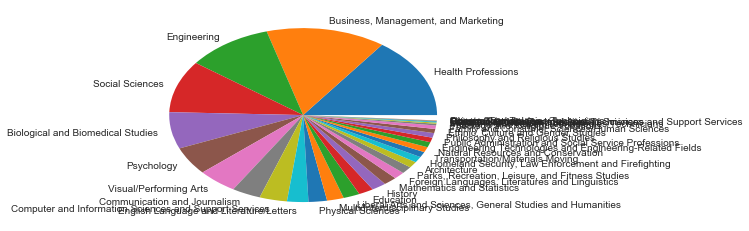

In [61]:
plt.pie(df_cip2[df_cip2["Bin"] == "high"]["value"],labels = df_cip2[df_cip2["Bin"] == "high"]["variable"])
plt.show()

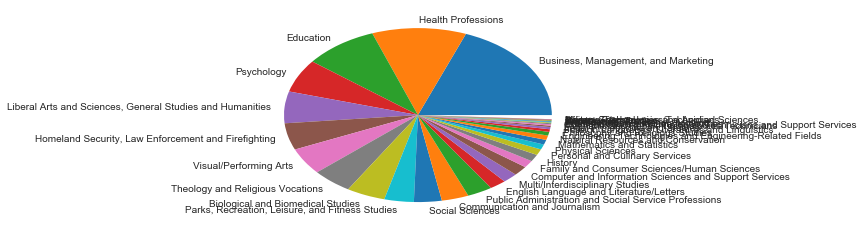

In [62]:
plt.pie(df_cip2[df_cip2["Bin"] == "low"]["value"],labels = df_cip2[df_cip2["Bin"] == "low"]["variable"])
plt.show()

In [76]:
gmaps.configure(api_key = gkey)

fig = gmaps.figure(map_type='SATELLITE')

# generate some (latitude, longitude) pairs
lat = df_merge3[df_merge3["Bin"]=="high"]["LATITUDE"]
lng = df_merge3[df_merge3["Bin"]=="high"]["LONGITUDE"]

locations = zip(lat,lng)

heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

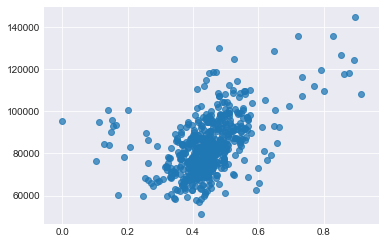

In [100]:
early_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["Mid-Career Pay"])
expend_public = list(df_merge3[df_merge3["School Type"].str.contains("State")]["Percent Undergrad Men"])

plt.scatter(expend_public, early_public, alpha = .75)